In [115]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [116]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.cluster.hierarchy as sch
import sklearn.cluster as sc
import sklearn.metrics.cluster as smc

# **TASK 1**

# **Dataset 1**

In [219]:
# creating dataframe from csv
df1_k = pd.read_csv("/content/drive/MyDrive/Data1.csv")
# view the rows and columens of the dataframe
df1_k

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,1
1,2,-0.000731,0.048211,0.069198,1
2,3,-0.060767,-0.009080,0.053085,1
3,4,0.013252,-0.011876,0.055324,1
4,5,-0.054508,-0.003813,0.001738,1
...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,7
208,209,0.396046,-0.858377,-3.126866,7
209,210,-0.406362,-0.334541,-2.885598,7
210,211,-0.299275,0.071281,-3.642585,7


## **KMeans for DS1**
Question 1

In [220]:
# use elbow method to get the number of clusters
k = []
wcss = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  #model selection for data point 
  mdl.fit(df1_k.iloc[:,1:4])
  k.append(i)
  wcss.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


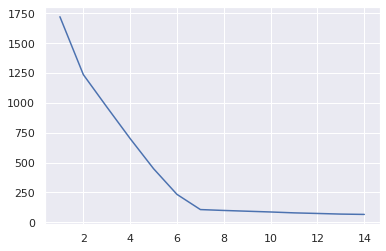

In [221]:
#displays data as points showing the frequency of each value.
sns.lineplot(k, wcss)

In [222]:
mdl = KMeans(n_clusters=7)
#model selection for data point 
mdl.fit(df1_k.iloc[:,1:4])
df1_k['predictor_class'] = mdl.labels_
#model selection for mean data point cluster 
mdl.cluster_centers_

array([[ 2.99953830e+00, -1.13086667e-03, -1.40059600e-01],
       [-2.99518840e+00, -1.37363333e-02,  8.82396000e-02],
       [-4.24071875e-03,  4.75815625e-03,  7.24671875e-03],
       [ 2.27123000e-02, -2.96813597e+00, -1.11774567e-01],
       [ 1.39986933e-01,  3.08174697e+00,  7.45050000e-02],
       [-4.72621667e-02,  4.58006333e-02, -3.04276190e+00],
       [-6.31190000e-03,  9.19421333e-02,  2.87236200e+00]])

Question 2 

In [223]:
##external validation metrics
##External validation metrics
print("****External validation metrics****\n")
#Rand Index measure between two clusterings by considering all pairs of samples and  counting
rand=metrics.adjusted_rand_score(df1_k['Class'],df1_k['predictor_class'])
print("Rand_score of the Dendogram:",rand)
#fowlkes_mallows_scoreMeasure the similarity of two clusterings of a set of points
fms=smc.fowlkes_mallows_score(df1_k['Class'],df1_k['predictor_class'])
print("\nFowlkes_Mallows_score for the Dendogram:", fms)
#Jaccard similarity coefficient score
js=metrics.jaccard_score(df1_k['Class'], df1_k['predictor_class'],average='micro')
print("\nJaccard_score:",js)

****External validation metrics****

Rand_score of the Dendogram: 1.0

Fowlkes_Mallows_score for the Dendogram: 1.0

Jaccard_score: 0.16483516483516483


Question 3

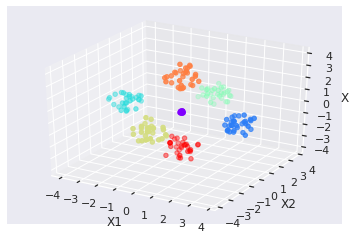

In [224]:
##original class plot
ax = plt.axes(projection='3d')
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
##set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df1_k['X3']
xdata = df1_k['X1']
ydata = df1_k['X2'];
# data sets of X, Y and Z to create the plot
ax.scatter3D(xdata, ydata, zdata, c=df1_k['Class'], cmap='rainbow');

Question 4

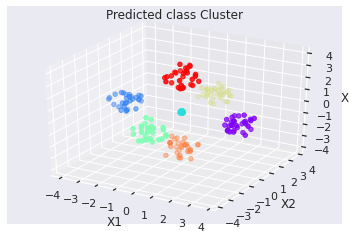

In [225]:
##clustering algorithm plot
ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
##set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df1_k['X3']
xdata = df1_k['X1']
ydata = df1_k['X2'];
# data sets of X, Y and Z to create the plot 
ax.scatter3D(xdata, ydata, zdata, c=df1_k['predictor_class'], cmap='rainbow');
# ax.scatter3D(xdata, ydata, zdata, c=df1_k['Class'], cmap='rainbow');
# ax.scatter3D(mdl.cluster_centers_[:,0],mdl.cluster_centers_[:,1],mdl.cluster_centers_[:,2],s=100,c='black',label ='Centroids');

## **Hierarchical  Clustering/Dendogram**

In [226]:
# reading csv file 
df1_h = pd.read_csv('/content/drive/MyDrive/Data1.csv')
X = df1_h.iloc[:,1:4].values
# view the rows and columens of the dataframe
df1_h

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,1
1,2,-0.000731,0.048211,0.069198,1
2,3,-0.060767,-0.009080,0.053085,1
3,4,0.013252,-0.011876,0.055324,1
4,5,-0.054508,-0.003813,0.001738,1
...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,7
208,209,0.396046,-0.858377,-3.126866,7
209,210,-0.406362,-0.334541,-2.885598,7
210,211,-0.299275,0.071281,-3.642585,7


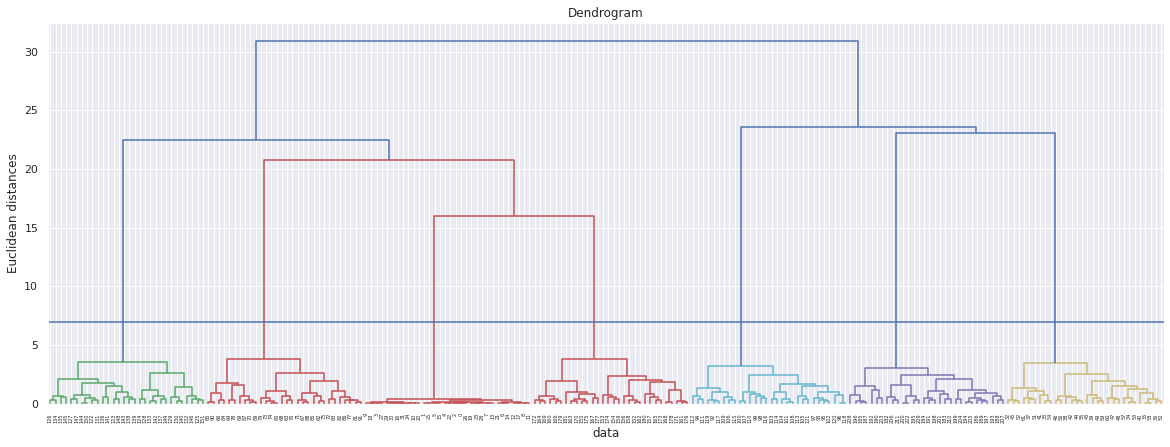

In [227]:
#dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
 #Tkinter Widget class for x -axies
plt.xlabel('data')
 #Tkinter Widget class for euclidean distances
plt.ylabel('Euclidean distances')
plt.axhline(y=7)
#all currently active objects opens interactive windows to display
plt.show()

In [228]:
## Clustering-Dendogram
clustering = sc.AgglomerativeClustering(n_clusters=7)
clustering.fit_predict(X)
clustering.labels_ 

#print(f"Number of clusters = {1+np.amax(clustering.labels_)}")

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [229]:
##External validation metrics
print("External validation metrics\n")
rand=metrics.adjusted_rand_score(df1_h['Class'],clustering.labels_)
print("Rand_score of the Dendogram:",rand)
fms=smc.fowlkes_mallows_score(df1_h['Class'],clustering.labels_)
print("\nFowlkes_Mallows_score for the Dendogram", fms)

External validation metrics

Rand_score of the Dendogram: 1.0

Fowlkes_Mallows_score for the Dendogram 1.0


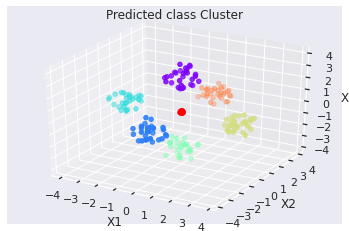

In [230]:
## #D Plot for the 
ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
##set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df1_h['X3']
xdata = df1_h['X1']
ydata = df1_h['X2'];
# data sets of X, Y and Z to create the plot 
ax.scatter3D(xdata, ydata, zdata, c=clustering.labels_, cmap='rainbow')


# **Dataset 2**


In [231]:
# reading csv file 
df2_k = pd.read_csv("/content/drive/MyDrive/Data2.csv")
df2_k.head(100)

#indexing Dataframe postion filtering unique elements from the  array
df2_k.iloc[:,4].unique()

array([1, 2, 3, 4])

## KMeans Clustering

In [232]:
k = []
wcss = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  #model selection for data  mean point cluster
  mdl.fit(df2_K.iloc[:,1:4])
  k.append(i)
  wcss.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


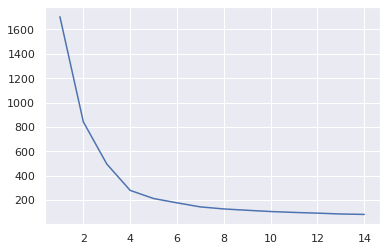

In [233]:
#displays data as points showing the frequency of each value.
sns.lineplot(k, wcss)

In [234]:
mdl = KMeans(n_clusters=4)
#model selection for data point
mdl.fit(df2_K.iloc[:,1:4])
df2_K['predictor_class'] = mdl.labels_
#model selection for data  mean point cluster
mdl.cluster_centers_

array([[2.9348529 , 2.55931128, 2.55146488],
       [1.0118234 , 0.75530155, 0.5346417 ],
       [3.04451388, 0.51152101, 0.48663013],
       [1.1534002 , 4.08301554, 1.04313881]])

Question 2

In [235]:
##external validation metrics

Rand=metrics.rand_score(df2_K['Class'],df2_K['predictor_class'])
print("Rand_score\n ",Rand)

fms=metrics.fowlkes_mallows_score(df2_K['Class'],df2_K['predictor_class'])
print("fowlkes_mallows_score\n ",fms)

Rand_score
  0.8200746873694814
fowlkes_mallows_score
  0.7237292929817782


Question 3

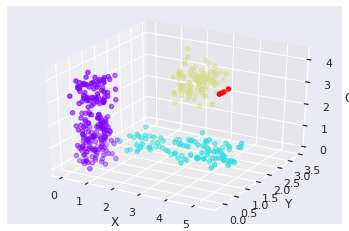

In [236]:
##original class plot
ax = plt.axes(projection='3d')
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
##set the label for the axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('C');
zdata = df2_K['X']
xdata = df2_K['Y']
ydata = df2_K['C'];
# data sets of X, Y and Z to create the plot 
ax.scatter3D(xdata, ydata, zdata, c=df2_K['Class'], cmap='rainbow');

Question 4


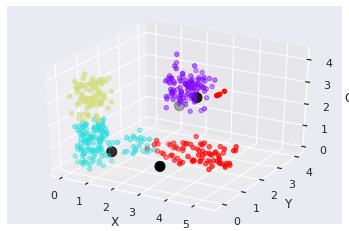

In [237]:
##original class plot
ax = plt.axes(projection='3d')
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
##set the label for the axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('C');
zdata = df2_K['X']
xdata = df2_K['Y']
ydata = df2_K['C'];
# data sets of X, Y and Z to create the plot 
ax.scatter3D(xdata, ydata, zdata, c=df2_K['predictor_class'], cmap='rainbow');
ax.scatter3D(mdl.cluster_centers_[:,0],mdl.cluster_centers_[:,1],mdl.cluster_centers_[:,2],s=100,c='black',label ='Centroids');

## **Hierarchical  Clustering/Dendogram**

In [238]:
df2_h = pd.read_csv("/content/drive/MyDrive/Data1.csv")
X = df2_h.iloc[:,1:4].values
# view the rows and columens of the dataframe
df2_h

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,1
1,2,-0.000731,0.048211,0.069198,1
2,3,-0.060767,-0.009080,0.053085,1
3,4,0.013252,-0.011876,0.055324,1
4,5,-0.054508,-0.003813,0.001738,1
...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,7
208,209,0.396046,-0.858377,-3.126866,7
209,210,-0.406362,-0.334541,-2.885598,7
210,211,-0.299275,0.071281,-3.642585,7


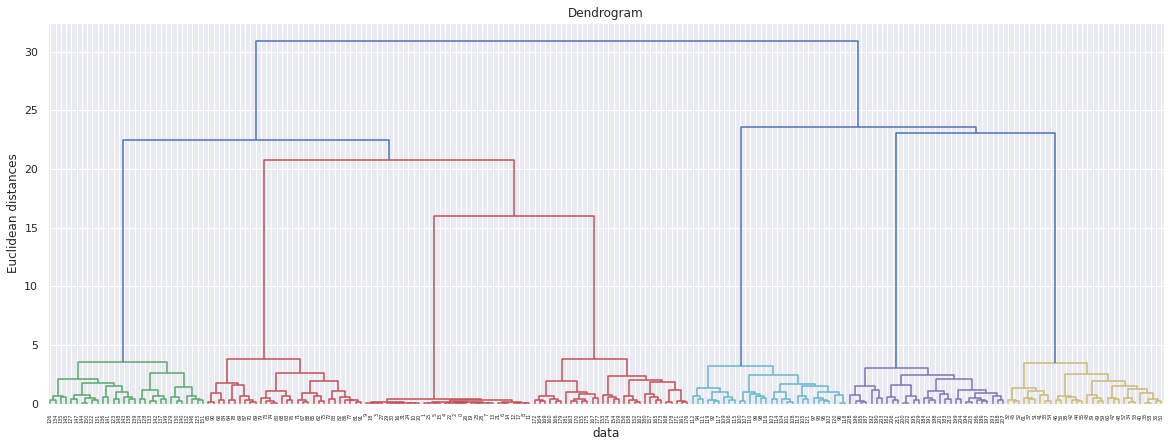

In [239]:
##
linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
 #Tkinter Widget class for x -axies
plt.xlabel('data')
 #Tkinter Widget class for euclidean distance 
plt.ylabel('Euclidean distances')
#all currently active objects opens interactive windows to display
plt.show()

###-alternate-dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))

In [240]:
## Clustering-Dendogram
clustering = sc.AgglomerativeClustering(n_clusters=4)
clustering.fit_predict(X)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [241]:
##External validation metrics
print("External validation metrics\n")
rand=metrics.adjusted_rand_score(df2_h['Class'],clustering.labels_)
print("Rand_score of the Dendogram:",rand)
fms=smc.fowlkes_mallows_score(df2_h['Class'],clustering.labels_)
print("\nFowlkes_Mallows_score for the Dendogram", fms)

External validation metrics

Rand_score of the Dendogram: 0.40508709880579136

Fowlkes_Mallows_score for the Dendogram 0.5979857201328858


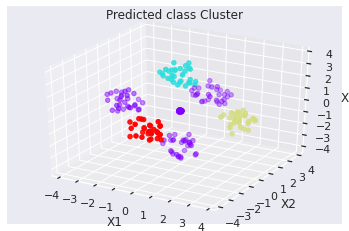

In [242]:
ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
##set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df2_h['X1']
xdata = df2_h['X2']
ydata = df2_h['X3'];
# data sets of X, Y and Z to create the plot 
ax.scatter3D(xdata, ydata, zdata, c=clustering.labels_, cmap='rainbow')

# **Dataset 3**


In [243]:
# reading csv file 
df3_K = pd.read_csv("/content/drive/MyDrive/Data3.csv")
# to view top 100 values of Data frame 
df3_K.head(100)
#indexing Dataframe postion filtering unique elements from the  array
df2_K.iloc[:,4].unique()

array([1, 2, 3, 4])

## **KMeans Clustering**

In [244]:
k = []
wcss = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  #model selection for data point
  mdl.fit(df3_K.iloc[:,1:4])
  k.append(i)
  wcss.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


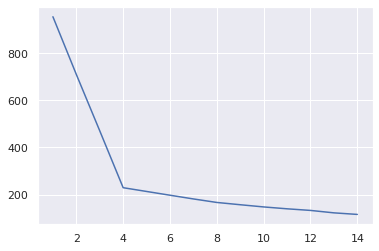

In [245]:
#displays data as points showing the frequency of each value.
sns.lineplot(k, wcss)

Question 1

In [246]:
mdl = KMeans(n_clusters=4)
mdl.fit(df3_K.iloc[:,1:4])
#model selection for data point 
df3_K['predictor_class'] = mdl.labels_
#model selection for data  mean point cluster
mdl.cluster_centers_

array([[-0.51838252, -1.16526495, -0.42573357],
       [ 1.3868734 , -0.06526492, -0.42573357],
       [-0.51838252,  1.0347351 , -0.42573357],
       [ 0.11670268, -0.06526492,  1.37055896]])

Question 2

In [247]:
##external validation metrics

Rand=metrics.rand_score(df3_K['Class'],df3_K['predictor_class'])
print("Rand_score\n ",Rand)
fms=metrics.fowlkes_mallows_score(df3_K['Class'],df3_K['predictor_class'])
print("fowlkes_mallows_score\n ",fms)

Rand_score
  1.0
fowlkes_mallows_score
  1.0


Question 3

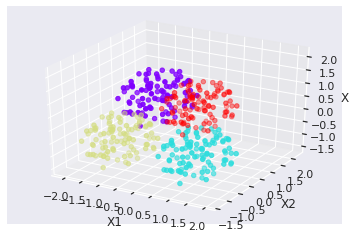

In [248]:
##original class plot
ax = plt.axes(projection='3d')
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
##set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df3_K['X1']
xdata = df3_K['X2']
ydata = df3_K['X3'];
# data sets of X, Y and Z to create the plot 
ax.scatter3D(xdata, ydata, zdata, c=df3_K['Class'], cmap='rainbow');

Question 4


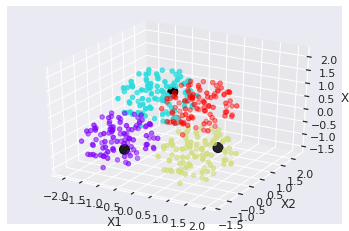

In [249]:
##original class plot
ax = plt.axes(projection='3d')
# creating numerical sequence 
zline = np.linspace(-2, 2)
xline = np.linspace(-2, 2)
yline = np.linspace(-2, 2)
##set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df3_K['X1']
xdata = df3_K['X2']
ydata = df3_K['X3'];
# data sets of X, Y and Z to create the plot 
ax.scatter3D(xdata, ydata, zdata, c=df3_K['predictor_class'], cmap='rainbow');
ax.scatter3D(mdl.cluster_centers_[:,0],mdl.cluster_centers_[:,1],mdl.cluster_centers_[:,2],s=100,c='black',label ='Centroids');

## **Hierarchical  Clustering/Dendogram**

In [250]:
# reading the csv file 
df3_h = pd.read_csv('/content/drive/MyDrive/Data3.csv')
X = df3_h.iloc[:,1:4].values
# view the rows and columens of the dataframe
df3_h

,Unnamed: 0,X1,X2,X3,Class
0,1,1.295428,0.050829,-0.385217,1
1,2,1.409178,-0.035191,-0.251980,1
2,3,1.096803,0.246365,-0.415011,1
3,4,1.463328,0.265354,-0.513488,1
4,5,1.603284,0.080577,-0.470257,1
...,...,...,...,...,...
395,396,0.795695,0.209456,1.880609,4
396,397,0.653127,-0.703156,1.549448,4
397,398,-0.726249,-0.103244,0.694300,4
398,399,0.808596,-0.492640,1.649370,4


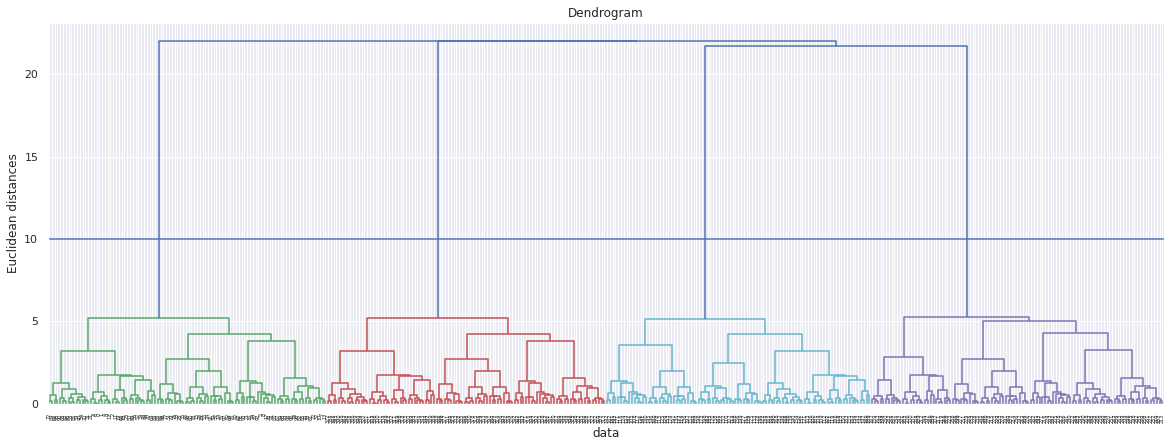

In [251]:
##

###-alternate-dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('data')
plt.ylabel('Euclidean distances')
plt.axhline(y=10)
#all currently active objects opens interactive windows to display
plt.show()


In [252]:
## Clustering-Dendogram
clustering = sc.AgglomerativeClustering(n_clusters=4)
clustering.fit_predict(X)
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [253]:
##External validation metrics
print("External validation metrics\n")
rand=metrics.adjusted_rand_score(df3_h['Class'],clustering.labels_)
print("Rand_score of the Dendogram:",rand)
fms=smc.fowlkes_mallows_score(df3_h['Class'],clustering.labels_)
print("\nFowlkes_Mallows_score for the Dendogram", fms)

External validation metrics

Rand_score of the Dendogram: 0.9672676330087653

Fowlkes_Mallows_score for the Dendogram 0.9753945158961902


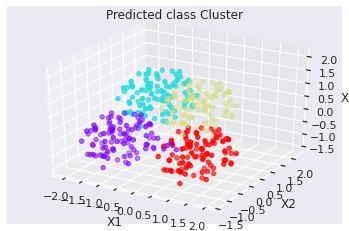

In [254]:
ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
#set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df3_h['X1']
xdata = df3_h['X2']
ydata = df3_h['X3'];
#data sets of X, Y and Z to create the plot 
ax.scatter3D(xdata, ydata, zdata, c=clustering.labels_, cmap='rainbow')

# **Dataset 4**

In [255]:
#reading csv data file 
df4_k = pd.read_csv('/content/drive/MyDrive/Data3.csv')
# filtering unique elements from the  array
df4_k['Class'].unique()
# view the rows and columens of the dataframe
df4_k

,Unnamed: 0,X1,X2,X3,Class
0,1,1.295428,0.050829,-0.385217,1
1,2,1.409178,-0.035191,-0.251980,1
2,3,1.096803,0.246365,-0.415011,1
3,4,1.463328,0.265354,-0.513488,1
4,5,1.603284,0.080577,-0.470257,1
...,...,...,...,...,...
395,396,0.795695,0.209456,1.880609,4
396,397,0.653127,-0.703156,1.549448,4
397,398,-0.726249,-0.103244,0.694300,4
398,399,0.808596,-0.492640,1.649370,4


## **KMeans for DS4**
Question 1

In [256]:
k = []
wcss = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
#model selection for data point 
  mdl.fit(df4_k.iloc[:,1:4])
  k.append(i)
  wcss.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


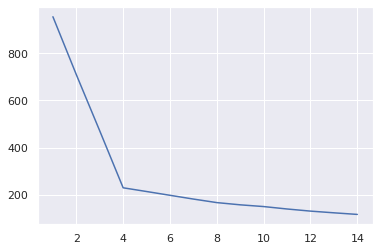

In [257]:
#displays data as points showing the frequency of each value.
sns.lineplot(k, wcss)

In [258]:
mdl = KMeans(n_clusters=2)
#model selection for data point
mdl.fit(df4_k.iloc[:,1:4])
df4_k['predictor_class'] = mdl.labels_
#model selection for data  mean point cluster
mdl.cluster_centers_

array([[-0.45947304, -0.07059401, -0.46747878],
       [ 0.7346737 , -0.05954927,  0.54976131]])

Question 2 

In [259]:
##external validation metrics

##External validation metrics
print("****External validation metrics****\n")
#Rand Index measure between two clusterings by considering all pairs of samples and  counting
rand=metrics.adjusted_rand_score(df4_k['Class'],df4_k['predictor_class'])
print("Rand_score of the Dendogram:",rand)
#fowlkes_mallows_scoreMeasure the similarity of two clusterings of a set of points
fms=smc.fowlkes_mallows_score(df4_k['Class'],df4_k['predictor_class'])
print("\nFowlkes_Mallows_score for the Dendogram:", fms)
#Jaccard similarity coefficient score
js=metrics.jaccard_score(df4_k['Class'], df4_k['predictor_class'],average='micro')
print("\nJaccard_score:",js)

****External validation metrics****

Rand_score of the Dendogram: 0.41457100368607436

Fowlkes_Mallows_score for the Dendogram: 0.6463161074981085

Jaccard_score: 0.12359550561797752


Question 3

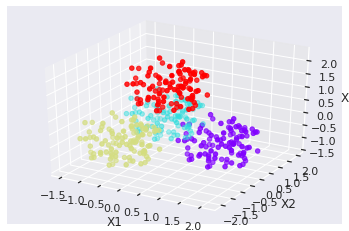

In [260]:
##original class plot
ax = plt.axes(projection='3d')
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
#set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
xdata = df4_k['X1']
ydata = df4_k['X2']
zdata = df4_k['X3'];
#data sets of X, Y and Z to create the plot 
ax.scatter3D(xdata, ydata, zdata, c=df4_k['Class'], cmap='rainbow');

Question 4

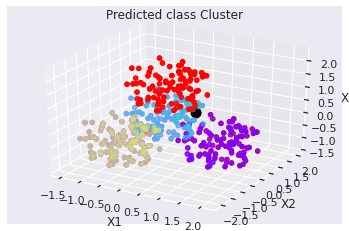

In [261]:
##clustering algorithm plot
ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
#set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df4_k['X3']
xdata = df4_k['X1']
ydata = df4_k['X2'];
#data sets of X, Y and Z to create the plot 
ax.scatter3D(xdata, ydata, zdata, c=df4_k['predictor_class'], cmap='rainbow');
ax.scatter3D(xdata, ydata, zdata, c=df4_k['Class'], cmap='rainbow');
ax.scatter3D(mdl.cluster_centers_[:,0],mdl.cluster_centers_[:,1],mdl.cluster_centers_[:,2],s=100,c='black',label ='Centroids');

## **Hierarchical  Clustering/Dendogram**

In [262]:
# reading csv data file 
df4_h = pd.read_csv('/content/drive/MyDrive/Data4.csv')
X = df4_h.iloc[:,1:4].values
# view the rows and columens of the dataframe
df4_h

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.45300,-0.8910,0.02300,1
1,2,0.65300,-0.8460,0.02110,1
2,3,0.39800,0.9130,-0.00139,1
3,4,0.09520,1.0500,0.00628,1
4,5,0.52400,-0.9410,0.03780,1
...,...,...,...,...,...
995,996,0.01520,0.0531,-0.36100,2
996,997,0.05160,0.6910,0.87500,2
997,998,-0.00511,1.3900,-0.94700,2
998,999,-0.06710,0.7140,0.88100,2


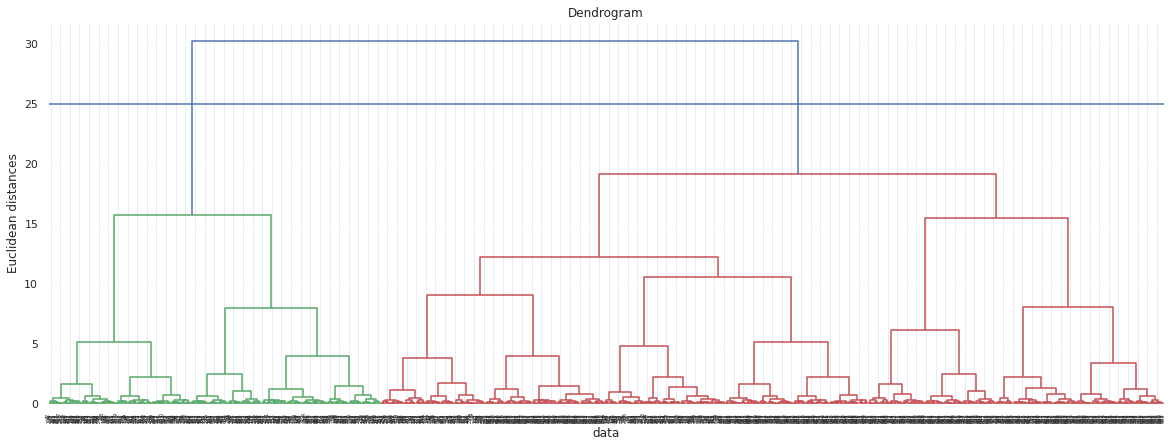

In [263]:
#dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
 #Tkinter Widget class for x -axies
plt.xlabel('data')
 #Tkinter Widget class for euclidean distance 
plt.ylabel('Euclidean distances')
plt.axhline(y=25)
#all currently active objects opens interactive windows to display
plt.show()

In [264]:
## Clustering-Dendogram
clustering = sc.AgglomerativeClustering(n_clusters=2)
clustering.fit_predict(X)
clustering.labels_

#print(f"Number of clusters = {1+np.amax(clustering.labels_)}")

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [265]:
##External validation metrics
print("External validation metrics\n")
#Rand Index measure between two clusterings by considering all pairs of samples and  counting
rand=metrics.adjusted_rand_score(df4_h['Class'],clustering.labels_)
print("Rand_score of the Dendogram:",rand)
#fowlkes_mallows_scoreMeasure the similarity of two clusterings of a set of points
fms=smc.fowlkes_mallows_score(df4_h['Class'],clustering.labels_)
print("\nFowlkes_Mallows_score for the Dendogram", fms)
#Jaccard similarity coefficient score
js=metrics.jaccard_score(df4_h['Class'],clustering.labels_,average='micro')
print("\nJaccard_score:",js)

External validation metrics

Rand_score of the Dendogram: 0.35706442581215536

Fowlkes_Mallows_score for the Dendogram 0.7042423466085546

Jaccard_score: 0.17577895355673134


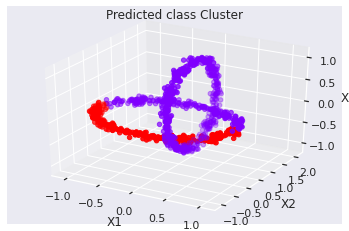

In [266]:
##3D Plot for the 
ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
#set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df4_h['X3']
xdata = df4_h['X1']
ydata = df4_h['X2'];
#data sets of X, Y and Z to create the plot
ax.scatter3D(xdata, ydata, zdata, c=clustering.labels_, cmap='rainbow')


# **Dataset** **5**


In [267]:
df5_k = pd.read_csv('/content/drive/MyDrive/Data5.csv')
#filtering unique elements from the  array
df5_k['Class'].unique()
# view the rows and columens of the dataframe
df5_k

,Unnamed: 0,X1,X2,X3,Class
0,1,-4.822490,-50.402170,4.020861,1
1,2,-44.460120,20.964670,-11.492060,1
2,3,50.001020,0.780748,9.134460,1
3,4,-41.699080,-22.310060,16.314120,1
4,5,4.425242,-4.666664,50.223740,1
...,...,...,...,...,...
795,796,-1.531027,0.681636,0.543271,2
796,797,0.500754,-1.848209,0.605654,2
797,798,1.089574,-0.246493,-3.355758,2
798,799,-1.907717,4.964502,2.098423,2


##**KMeans for** **DS5**

question 1

In [268]:
k = []
wcss = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  #model selection for data  point 
  mdl.fit(df5_k.iloc[:,1:4])
  k.append(i)
  wcss.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


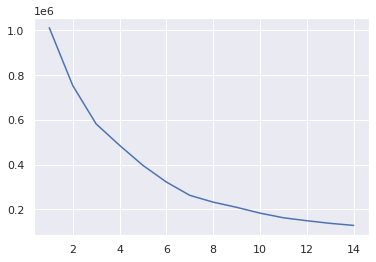

In [269]:
#displays data as points showing the frequency of each value.
sns.lineplot(k, wcss)

In [270]:
mdl = KMeans(n_clusters=2)
#model selection for data  mean point cluster
mdl.fit(df5_k.iloc[:,1:4])
df5_k['predictor_class'] = mdl.labels_
#model selection for data  mean point cluster
mdl.cluster_centers_

array([[-9.01628338, -3.77555523, 34.10740302],
       [ 1.67324664, -0.14618357, -8.22394005]])

question 2

In [271]:
##external validation metrics

##External validation metrics
print("****External validation metrics****\n")
#Rand Index measure between two clusterings by considering all pairs of samples and  counting
rand=metrics.adjusted_rand_score(df5_k['Class'],df5_k['predictor_class'])
print("Rand_score of the Dendogram:",rand)
#fowlkes_mallows_scoreMeasure the similarity of two clusterings of a set of points
fms=smc.fowlkes_mallows_score(df5_k['Class'],df5_k['predictor_class'])
print("\nFowlkes_Mallows_score for the Dendogram:", fms)
#Jaccard similarity coefficient score
js=metrics.jaccard_score(df5_k['Class'], df5_k['predictor_class'],average='micro')
print("\nJaccard_score:",js)

****External validation metrics****

Rand_score of the Dendogram: 0.18206807775637826

Fowlkes_Mallows_score for the Dendogram: 0.654708512069173

Jaccard_score: 0.16703136396790663


question 3

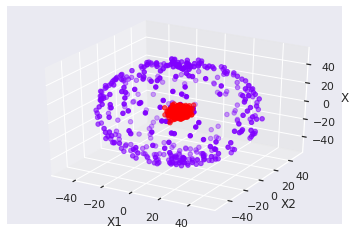

In [272]:
##original class plot
ax = plt.axes(projection='3d')
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
#set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
xdata = df5_k['X1']
ydata = df5_k['X2']
zdata = df5_k['X3'];
#data sets of X, Y and Z to create the plot
ax.scatter3D(xdata, ydata, zdata, c=df5_k['Class'], cmap='rainbow');

question 4

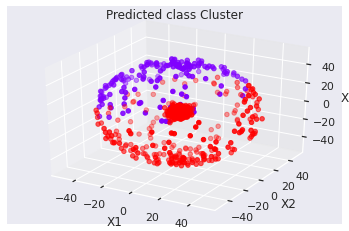

In [273]:
##clustering algorithm plot
ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
# creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
#set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df5_k['X3']
xdata = df5_k['X1']
ydata = df5_k['X2'];
#data sets of X, Y and Z to create the plot
ax.scatter3D(xdata, ydata, zdata, c=df5_k['predictor_class'], cmap='rainbow');
# ax.scatter3D(xdata, ydata, zdata, c=df5_k['Class'], cmap='rainbow');
# ax.scatter3D(mdl.cluster_centers_[:,0],mdl.cluster_centers_[:,1],mdl.cluster_centers_[:,2],s=100,c='black',label ='Centroids');

##**Hierarchical Clustering**/**Dendogram**

In [274]:
# reading csv data file 
df5_h = pd.read_csv('/content/drive/MyDrive/Data5.csv')
X = df5_h.iloc[:,1:4].values
# view the rows and columens of the dataframe
df5_h

,Unnamed: 0,X1,X2,X3,Class
0,1,-4.822490,-50.402170,4.020861,1
1,2,-44.460120,20.964670,-11.492060,1
2,3,50.001020,0.780748,9.134460,1
3,4,-41.699080,-22.310060,16.314120,1
4,5,4.425242,-4.666664,50.223740,1
...,...,...,...,...,...
795,796,-1.531027,0.681636,0.543271,2
796,797,0.500754,-1.848209,0.605654,2
797,798,1.089574,-0.246493,-3.355758,2
798,799,-1.907717,4.964502,2.098423,2


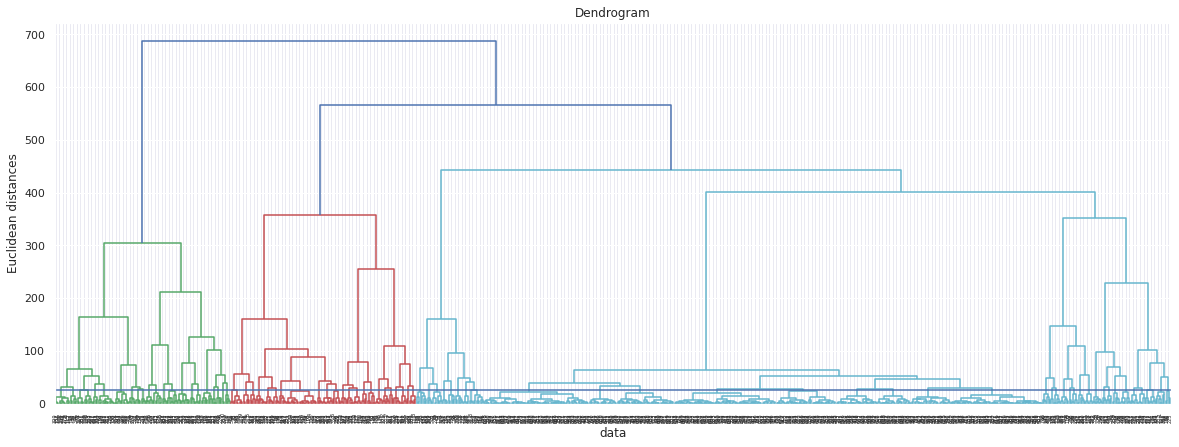

In [275]:
#dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
 #Tkinter Widget class for x -axies
plt.xlabel('data')
 #Tkinter Widget class for euclidean distance 
plt.ylabel('Euclidean distances')
plt.axhline(y=25)
#all currently active objects opens interactive windows to display
plt.show()

In [276]:
## Clustering-Dendogram
clustering = sc.AgglomerativeClustering(n_clusters=2)
clustering.fit_predict(X)
clustering.labels_
#print(f"Number of clusters = {1+np.amax(clustering.labels_)}")

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [277]:
##External validation metrics
print("External validation metrics\n")
#Rand Index measure between two clusterings by considering all pairs of samples and  counting
rand=metrics.adjusted_rand_score(df5_h['Class'],clustering.labels_)
print("Rand_score of the Dendogram:",rand)
#fowlkes_mallows_scoreMeasure the similarity of two clusterings of a set of points
fms=smc.fowlkes_mallows_score(df5_h['Class'],clustering.labels_)
print("\nFowlkes_Mallows_score for the Dendogram", fms)
#Jaccard similarity coefficient score
js=metrics.jaccard_score(df5_h['Class'],clustering.labels_,average='micro')
print("\nJaccard_score:",js)

External validation metrics

Rand_score of the Dendogram: 0.09862621818643041

Fowlkes_Mallows_score for the Dendogram 0.6462836986049043

Jaccard_score: 0.08548168249660787


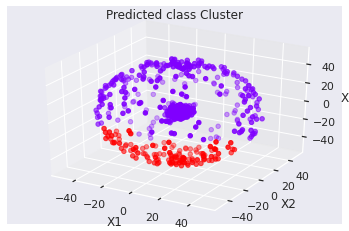

In [278]:
##3D Plot for the 
ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
#creating numerical sequence 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
#set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df5_h['X3']
xdata = df5_h['X1']
ydata = df5_h['X2'];
#data sets of X, Y and Z to create the plot 
ax.scatter3D(xdata, ydata, zdata, c=clustering.labels_, cmap='rainbow')

# **Dataset 6**

In [279]:
#reading csv data file 
df6_k = pd.read_csv('/content/drive/MyDrive/Data6.csv')
# filtering unique elements from the  array
df6_k['Class'].unique()
df6_k

,Unnamed: 0,X1,X2,Class
0,1,1.388261,2.076096,1
1,2,2.177247,3.102304,1
2,3,0.378645,5.307610,1
3,4,3.681732,1.622681,1
4,5,2.462861,2.777897,1
...,...,...,...,...
4091,4092,0.909687,0.375763,2
4092,4093,2.698381,0.511262,2
4093,4094,1.078797,1.526153,2
4094,4095,1.974889,-0.649343,2


## **KMeans for DS6**
Question 1

In [280]:
k = []
wcss = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  #model selection for data point 
  mdl.fit(df6_k.iloc[:,1:3])
  k.append(i)
  wcss.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


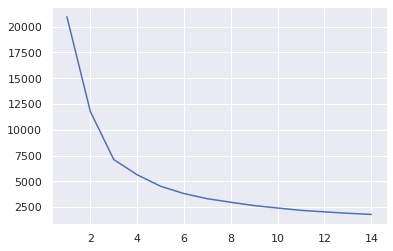

In [281]:
#displays data as points showing the frequency of each value.
sns.lineplot(k, wcss)

In [282]:
mdl = KMeans(n_clusters=2)
#model selection for data point 
mdl.fit(df6_k.iloc[:,1:3])
df6_k['predictor_class'] = mdl.labels_
#model selection for data  mean point cluster
mdl.cluster_centers_
df6_k

,Unnamed: 0,X1,X2,Class,predictor_class
0,1,1.388261,2.076096,1,0
1,2,2.177247,3.102304,1,0
2,3,0.378645,5.307610,1,0
3,4,3.681732,1.622681,1,0
4,5,2.462861,2.777897,1,0
...,...,...,...,...,...
4091,4092,0.909687,0.375763,2,1
4092,4093,2.698381,0.511262,2,1
4093,4094,1.078797,1.526153,2,1
4094,4095,1.974889,-0.649343,2,1


Question 2 

In [283]:
##external validation metrics

##External validation metrics
print("****External validation metrics****\n")
#Rand Index measure between two clusterings by considering all pairs of samples and  counting
rand=metrics.adjusted_rand_score(df6_k['Class'],df6_k['predictor_class'])
print("Rand_score of the Dendogram:",rand)
#fowlkes_mallows_scoreMeasure the similarity of two clusterings of a set of points
fms=smc.fowlkes_mallows_score(df6_k['Class'],df6_k['predictor_class'])
print("\nFowlkes_Mallows_score for the Dendogram:", fms)
#Jaccard similarity coefficient score
js=metrics.jaccard_score(df6_k['Class'], df6_k['predictor_class'],average='micro')
print("\nJaccard_score:",js)

****External validation metrics****

Rand_score of the Dendogram: 0.815060637690859

Fowlkes_Mallows_score for the Dendogram: 0.9076346454086384

Jaccard_score: 0.0056469432850478765


Question 3

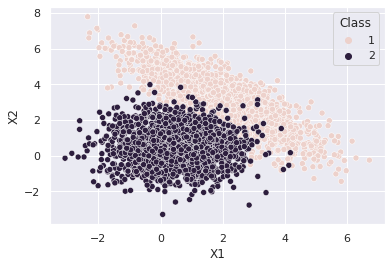

In [284]:
##original class plot
sns.scatterplot(x='X1', y='X2', data=df6_k, hue='Class')

Question 4

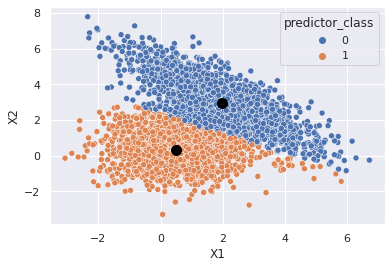

In [285]:
##clustering algorithm plot.   
sns.scatterplot(x='X1', y='X2', data=df6_k, hue=df6_k['predictor_class'])
plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
#all currently active objects opens interactive windows to display
plt.show()

## **Hierarchical  Clustering/Dendogram**

In [286]:
# reading csv data file 
df6_h = pd.read_csv('/content/drive/MyDrive/Data6.csv')
X = df6_h.iloc[:,1:3].values

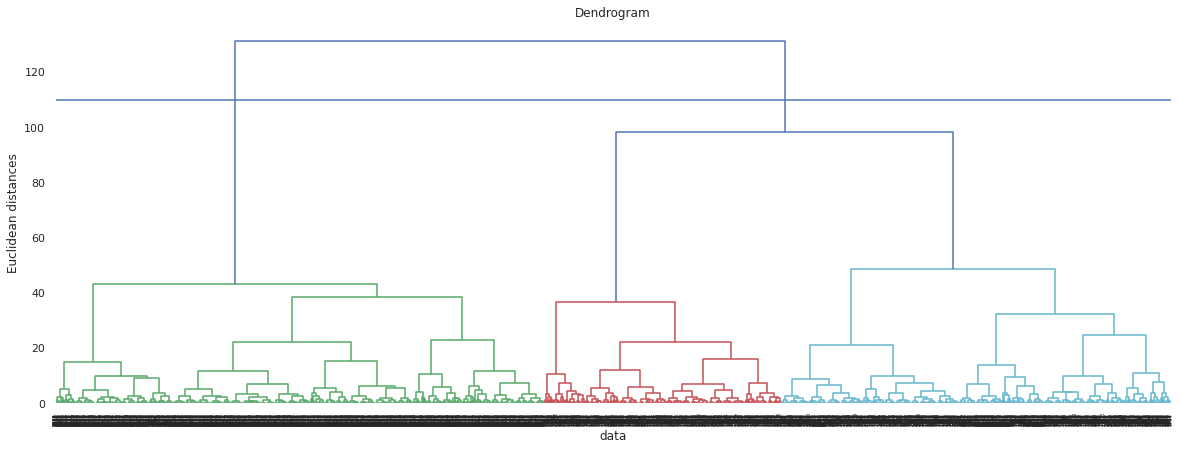

In [287]:
#dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
#Tkinter Widget class for x -axies
plt.xlabel('data')
#Tkinter Widget class for euclidean distance -axies
plt.ylabel('Euclidean distances')
plt.axhline(y=110)
#all currently active objects opens interactive windows to display
plt.show()

In [288]:
## Clustering-Dendogram
clustering = sc.AgglomerativeClustering(n_clusters=2)
clustering.fit_predict(X)
clustering.labels_

#print(f"Number of clusters = {1+np.amax(clustering.labels_)}")

array([0, 0, 0, ..., 1, 1, 1])

In [289]:
##External validation metrics
print("External validation metrics\n")
#Rand Index measure between two clusterings by considering all pairs of samples and  counting
rand=metrics.adjusted_rand_score(df6_h['Class'],clustering.labels_)
print("Rand_score of the Dendogram:",rand)
#fowlkes_mallows_scoreMeasure the similarity of two clusterings of a set of points
fms=smc.fowlkes_mallows_score(df6_h['Class'],clustering.labels_)
print("\nFowlkes_Mallows_score for the Dendogram", fms)
#Jaccard similarity coefficient score
js=metrics.jaccard_score(df6_h['Class'],clustering.labels_,average='micro')
print("\nJaccard_score:",js)

External validation metrics

Rand_score of the Dendogram: 0.7184533725930805

Fowlkes_Mallows_score for the Dendogram 0.8602399807978651

Jaccard_score: 0.00392156862745098


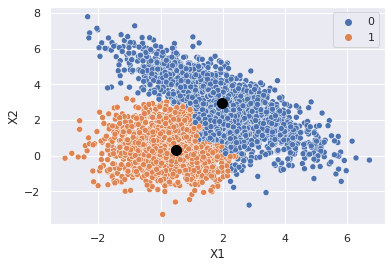

In [291]:
##3D Plot for the 
sns.scatterplot(x='X1', y='X2', data=df6_k, hue=clustering.labels_)
plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
#all currently active objects opens interactive windows to display
plt.show()



#**Dataset** **7**

In [292]:
#reading csv data file 
df7_k = pd.read_csv('/content/drive/MyDrive/Data7.csv')
# filtering unique elements from the  array
df7_k

,Unnamed: 0,X1,X2,Class
0,1,-3.000000,-3.000000,5
1,2,-3.000000,3.000000,4
2,3,3.000000,-3.000000,6
3,4,3.000000,3.000000,3
4,5,-0.417091,0.114782,1
...,...,...,...,...
765,766,-1.604434,-1.118861,2
766,767,-3.050000,-3.050000,5
767,768,-3.050000,2.950000,4
768,769,2.950000,-3.050000,6


## **KMeans for DS7**
Question 1

In [293]:
k = []
wcss = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  #model selection for data point 
  mdl.fit(df7_k.iloc[:,1:3])
  k.append(i)
  wcss.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


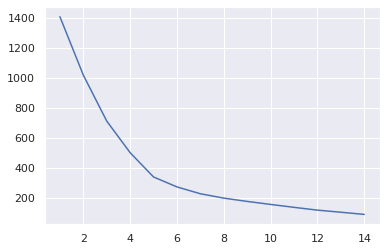

In [294]:
#displays data as points showing the frequency of each value.
sns.lineplot(k, wcss)

In [295]:
mdl = KMeans(n_clusters=5)
#model selection for data point 
mdl.fit(df7_k.iloc[:,1:3])
df7_k['predictor_class'] = mdl.labels_
#model selection for data  mean point cluster
mdl.cluster_centers_

array([[-1.08116062, -1.30840123],
       [ 0.00909089, -0.02326302],
       [-1.24006227,  1.15081667],
       [ 1.32634626, -1.01080009],
       [ 1.1258747 ,  1.25385075]])

Question 2 

In [296]:
##external validation metrics

##External validation metrics
print("****External validation metrics****\n")
#Rand Index measure between two clusterings by considering all pairs of samples and  counting
rand=metrics.adjusted_rand_score(df7_k['Class'],df7_k['predictor_class'])
print("Rand_score of the Dendogram:",rand)
#fowlkes_mallows_scoreMeasure the similarity of two clusterings of a set of points
fms=smc.fowlkes_mallows_score(df7_k['Class'],df7_k['predictor_class'])
print("\nFowlkes_Mallows_score for the Dendogram:", fms)
#Jaccard similarity coefficient score
js=metrics.jaccard_score(df7_k['Class'], df7_k['predictor_class'],average='micro')
print("\nJaccard_score:",js)

****External validation metrics****

Rand_score of the Dendogram: 0.6552741707017764

Fowlkes_Mallows_score for the Dendogram: 0.8052354860303211

Jaccard_score: 0.4680648236415634


Question 3

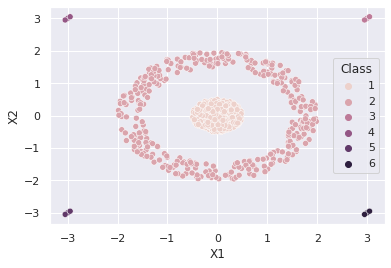

In [297]:
##original class plot
sns.scatterplot(x='X1', y='X2', data=df7_k, hue='Class')

Question 4

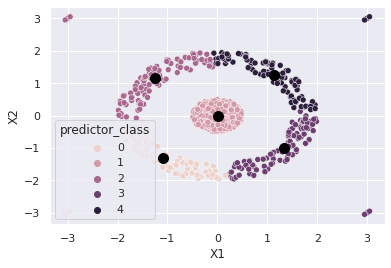

In [298]:
##clustering algorithm plot.   
sns.scatterplot(x='X1', y='X2', data=df7_k, hue=df7_k['predictor_class'])
plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
#all currently active objects opens interactive windows to display
plt.show()

## **Dendogram DS7**

In [299]:
#reading csv data file 
df7_h = pd.read_csv('/content/drive/MyDrive/Data7.csv')
# filtering unique elements from the  array
X = df7_h.iloc[:,1:3].values

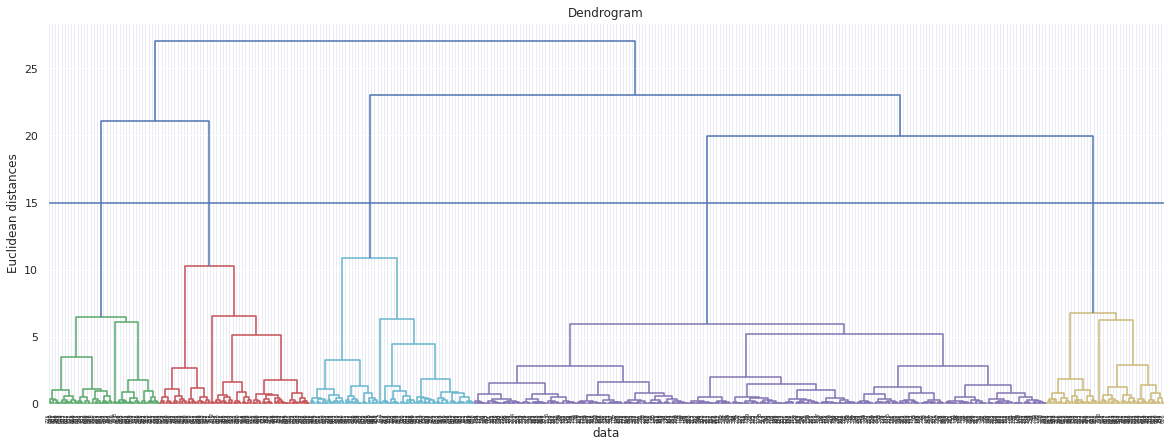

In [300]:
#dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
#Tkinter Widget class for x -axies 
plt.xlabel('data')
#Tkinter Widget class for Euclidean distances
plt.ylabel('Euclidean distances')
plt.axhline(y=15)
#all currently active objects opens interactive windows to display
plt.show()

In [301]:
## Clustering-Dendogram
clustering = sc.AgglomerativeClustering(n_clusters=2)
clustering.fit_predict(X)
#Tkinter Widget class 
clustering.labels_
#print(f"Number of clusters = {1+np.amax(clustering.labels_)}")

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [302]:
##External validation metrics
print("External validation metrics\n")
#Rand Index measure between two clusterings by considering all pairs of samples and  counting
rand=metrics.adjusted_rand_score(df7_h['Class'],clustering.labels_)
print("Rand_score of the Dendogram:",rand)
#fowlkes_mallows_scoreMeasure the similarity of two clusterings of a set of points
fms=smc.fowlkes_mallows_score(df7_h['Class'],clustering.labels_)
print("\nFowlkes_Mallows_score for the Dendogram", fms)
#Jaccard similarity coefficient score
js=metrics.jaccard_score(df7_h['Class'],clustering.labels_,average='micro')
print("\nJaccard_score:",js)

External validation metrics

Rand_score of the Dendogram: 0.2516297948543798

Fowlkes_Mallows_score for the Dendogram 0.6708839283631339

Jaccard_score: 0.0


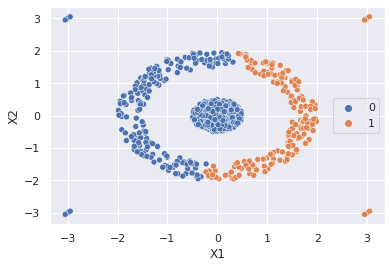

In [303]:
##3D Plot for the 
sns.scatterplot(x='X1', y='X2', data=df7_k, hue=clustering.labels_)
#plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
#all currently active objects opens interactive windows to display
plt.show()

#**Dataset 8**

In [304]:
df8_k = pd.read_csv('/content/drive/MyDrive/Data8.csv')
#filtering unique elements from the  array
df8_k['Class'].unique()
# view the rows and columens of the dataframe
df8_k

,Unnamed: 0,X1,X2,X3,Class
0,1,0.000000,0.000000,1.00000,1
1,2,0.000000,0.052336,0.99863,1
2,3,0.049774,0.016173,0.99863,1
3,4,0.030762,-0.042341,0.99863,1
4,5,-0.030762,-0.042341,0.99863,1
...,...,...,...,...,...
3997,3998,0.049774,-0.016173,-0.99863,1
3998,3999,0.000000,-0.052336,-0.99863,1
3999,4000,-0.049774,-0.016173,-0.99863,1
4000,4001,-0.030762,0.042341,-0.99863,1


## KMeans 

In [305]:
k = []
wcss = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  #model selection for data point 
  mdl.fit(df8_k.iloc[:,1:4])
  k.append(i)
  wcss.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


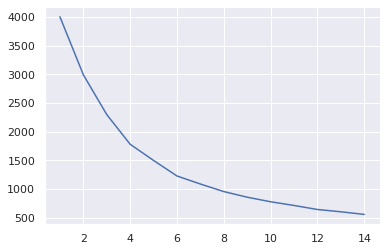

In [306]:
#displays data as points showing the frequency of each value.
sns.lineplot(k, wcss)

In [307]:
mdl = KMeans(n_clusters=3)
#model selection for data point
mdl.fit(df8_k.iloc[:,1:4])
df8_k['predictor_class'] = mdl.labels_
#model selection for data  mean point cluster
mdl.cluster_centers_

array([[-0.37044378,  0.53011476, -0.08908619],
       [-0.27263072, -0.59347215, -0.0139987 ],
       [ 0.64094666,  0.06272395,  0.10276601]])

question 2

In [308]:
##external validation metrics

##External validation metrics
print("****External validation metrics****\n")
#Rand Index measure between two clusterings by considering all pairs of samples and  counting
rand= metrics.adjusted_rand_score(df8_k['Class'],df8_k['predictor_class'])
print("Rand_score of the Dendogram:",rand)
#fowlkes_mallows_scoreMeasure the similarity of two clusterings of a set of points
#fowlkes_mallows_scoreMeasure the similarity of two clusterings of a set of points
fms=smc.fowlkes_mallows_score(df8_k['Class'],df8_k['predictor_class'])
print("\nFowlkes_Mallows_score for the Dendogram:", fms)
#Jaccard similarity coefficient score
js=metrics.jaccard_score(df8_k['Class'], df8_k['predictor_class'],average='micro')
print("\nJaccard_score:",js)

****External validation metrics****

Rand_score of the Dendogram: 0.0

Fowlkes_Mallows_score for the Dendogram: 0.5772099530120661

Jaccard_score: 0.19946051251311253


question 3

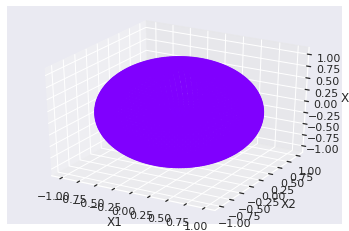

In [309]:
##original class plot
ax = plt.axes(projection='3d')
#creating numeric sequences 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
#set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
xdata = df8_k['X1']
ydata = df8_k['X2']
zdata = df8_k['X3'];
#data sets of X, Y and Z to create the plot
ax.scatter3D(xdata, ydata, zdata, c=df8_k['Class'], cmap='rainbow');

question 4

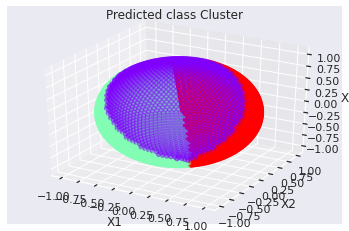

In [310]:
##clustering algorithm plot
ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
#creating numeric sequences 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
#set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df8_k['X3']
xdata = df8_k['X1']
ydata = df8_k['X2'];
#data sets of X, Y and Z to create the plot
ax.scatter3D(xdata, ydata, zdata, c=df8_k['predictor_class'], cmap='rainbow');
#ax.scatter3D(xdata, ydata, zdata, c=df5_k['Class'], cmap='rainbow');
ax.scatter3D(mdl.cluster_centers_[:,0],mdl.cluster_centers_[:,1],mdl.cluster_centers_[:,2],s=100,c='black',label ='Centroids');

##**Hierarchical Clustering/Dendogram**

In [311]:
#reading csv file 
df8_h = pd.read_csv('/content/drive/MyDrive/Data8.csv')
X = df8_h.iloc[:,1:4].values
#view  rows and cloumn for dataframe
df8_h

,Unnamed: 0,X1,X2,X3,Class
0,1,0.000000,0.000000,1.00000,1
1,2,0.000000,0.052336,0.99863,1
2,3,0.049774,0.016173,0.99863,1
3,4,0.030762,-0.042341,0.99863,1
4,5,-0.030762,-0.042341,0.99863,1
...,...,...,...,...,...
3997,3998,0.049774,-0.016173,-0.99863,1
3998,3999,0.000000,-0.052336,-0.99863,1
3999,4000,-0.049774,-0.016173,-0.99863,1
4000,4001,-0.030762,0.042341,-0.99863,1


In [ ]:
#dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
#Tkinter Widget class for x -axis  
plt.xlabel('data')
#Tkinter Widget class for Euclidean distance  
plt.ylabel('Euclidean distances')
plt.axhline(y=37)
#all currently active objects opens interactive windows to display
plt.show()

In [ ]:
## Clustering-Dendogram
clustering = sc.AgglomerativeClustering(n_clusters=2)
clustering.fit_predict(X)
clustering.labels_

#print(f"Number of clusters = {1+np.amax(clustering.labels_)}")

In [ ]:
##External validation metrics
print("External validation metrics\n")
#Rand Index measure between two clusterings by considering all pairs of samples and counting
rand=metrics.adjusted_rand_score(df8_h['Class'],clustering.labels_)
print("Rand_score of the Dendogram:",rand)
#fowlkes_mallows_scoreMeasure the similarity of two clusterings of a set of points
fms=smc.fowlkes_mallows_score(df8_h['Class'],clustering.labels_)
print("\nFowlkes_Mallows_score for the Dendogram", fms)
#Jaccard similarity coefficient score
js=metrics.jaccard_score(df8_h['Class'],clustering.labels_,average='micro')
print("\nJaccard_score:",js)

In [ ]:
##3D Plot for the 
ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
#creating numeric sequences 
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
#set the label for the axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = df8_h['X3']
xdata = df8_h['X1']
ydata = df8_h['X2'];
#data sets of X, Y and Z to create the plot
ax.scatter3D(xdata, ydata, zdata, c=clustering.labels_, cmap='rainbow')

# **TASK 2**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as pp

In [ ]:
df_wi = pd.read_csv('/content/drive/MyDrive/World+Indicators.csv')
df_wi['Business Tax Rate'] = df_wi['Business Tax Rate'].str.rstrip("%").astype('float')
df_wi['GDP'] = df_wi['GDP'].replace('[\$,]', '', regex=True).astype("float")
df_wi['Health Exp/Capita'] = df_wi['Health Exp/Capita'].replace('[\$,]', '', regex=True).astype("float")
## fill Nan values with mean of the column
df_wi.fillna(df_wi.mean(), inplace=True)
df_wi.fillna(df_wi.mean(), inplace=True)
df_wi
##Truncating Health and Population data
df_m=df_wi.iloc[:,[0,4,5,6,8,11,12,14,15,16,17,18,19]]
df_m
## Encoding the Reginal data
df_m_encoder = LabelEncoder()
df_m_encoder.fit(df_m['Region'])
df_m_encoder = df_m_encoder.transform(df_m['Region'])
df_m['Region_C']=df_m_encoder
df_m

In [ ]:
##Selecting Required Columns for cluster analysis
df=df_m.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,13,12,11]]
df.iloc[:,0:-2]

##Question 1 - Clusterin(KMeans and Hierarchial)

In [ ]:
k = []
wcss = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  #model selection by position of points
  mdl.fit(df.iloc[:,:-3])
  k.append(i)
  #sum of squared distance between each point from centroid in a cluster 
  wcss.append(mdl.inertia_)

sns.lineplot(k, wcss,marker='o')


In [ ]:
mdl = KMeans(n_clusters=4)
#model selection by  position of points 
mdl.fit(df.iloc[:,:-3])
df['Groups'] = mdl.labels_
# mean points of  clustering 
mdl.cluster_centers_

In [ ]:
#dendrograms clustring 
X = df.iloc[:,:-3].values
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
#to add a horizontal line across the axis.
plt.axhline(y=6, color='r', linestyle='--')
#hierarchical clustering used to group objects in clusters based on their similarity
cluster = sc.AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
H_labels=cluster.fit_predict(X)

## Question 2

Silhouette coefficient -\
Use Internal validation metrics to report the cluster quality for Kmeans and Hierarchy

In [ ]:
sil_coeff = []
# minimum 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df.iloc[:,:-3])
  sc = metrics.silhouette_score(df.iloc[:,:-3], kmeans.labels_)
  #sum of squared error 
  sil_coeff.append(sc)
plt.plot(range(2, 11), sil_coeff,marker='o')
plt.xticks(range(2, 11))
#Tkinter widget class for x -axis 
plt.xlabel("No. of Clusters")
#Tkinter widget class for y -axis 
plt.ylabel("Silhouette Coefficient")
# currently active figure objects interactive windows that display your figure 
plt.show()
# for 4 clusters we can obsrver tha we have a Silhouette Coefficient of 0.875

In [ ]:
## Silhouette coefficient for Dendograms 

sc_h = metrics.silhouette_score(df.iloc[:,:-3], H_labels)
print("Silhouette coefficient for the Dendogram",sc_h)
# for 2 clusters we can obsrver tha we have a dendogram of 0.9596

## Question 3

Report the best clustering solution. Give a detailed list of all the groups and the
countries included within the groups

In [ ]:
# clusting of DataFrame of  dendogram is  better than Silhouette coefficient
df1=df[['Country','Groups']].sort_values(by='Groups')
df1

##Question 4

Generate three different scatter plots of your choice and color the data points
according to the group.Example: “Life expectancyvs GDP”,  “Infant Mortality vs
GDP”, etc.

In [ ]:
#selecting two groups for ploting 
birth_rate_data = df[['Birth Rate', 'GDP']]
population_urban_data = df[['Population Urban', 'GDP']]
#colour encoding for each selected columns 
sns.scatterplot(x='Birth Rate', y='GDP', data=birth_rate_data, hue=mdl.labels_)
# currently active figure objects interactive windows that display your figure 
plt.show()

In [ ]:
#selecting two groups for ploting 
population_urban_data = df[['Population Urban', 'GDP']]
#colour encoding for each selected columns 
sns.scatterplot(x='Population Urban', y='GDP', data=population_urban_data, hue=mdl.labels_)
# currently active figure objects interactive windows that display your figure 
plt.show()


In [ ]:
#selecting two groups for ploting 
health_exp_GDP_data = df[['Health Exp % GDP', 'GDP']]
#colour encoding for each selected columns 
sns.scatterplot(x='Health Exp % GDP', y='GDP', data=health_exp_GDP_data, hue=mdl.labels_)
# all currently active figure objects interactive windows that display your figure 
plt.show()